In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
company=pd.read_csv("D:/Excelr Solutions/Data Science/Assiments/Dicision Tree/Company_Data.csv")

In [3]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
company.sample(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
356,3.58,142,109,0,111,164,Good,72,12,Yes,No
15,8.71,149,95,5,400,144,Medium,76,18,No,No
363,10.26,111,75,1,377,108,Good,25,12,Yes,No
337,8.61,130,38,0,283,102,Medium,80,15,Yes,No
124,8.87,131,113,0,181,120,Good,63,14,Yes,No
277,7.80,136,48,12,326,125,Medium,36,16,Yes,Yes
321,7.52,123,39,5,499,98,Medium,34,15,Yes,No
10,9.01,121,78,9,150,100,Bad,26,10,No,Yes
23,5.87,121,31,0,292,109,Medium,79,10,Yes,No
225,6.68,107,25,0,412,82,Bad,36,14,Yes,No


In [5]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


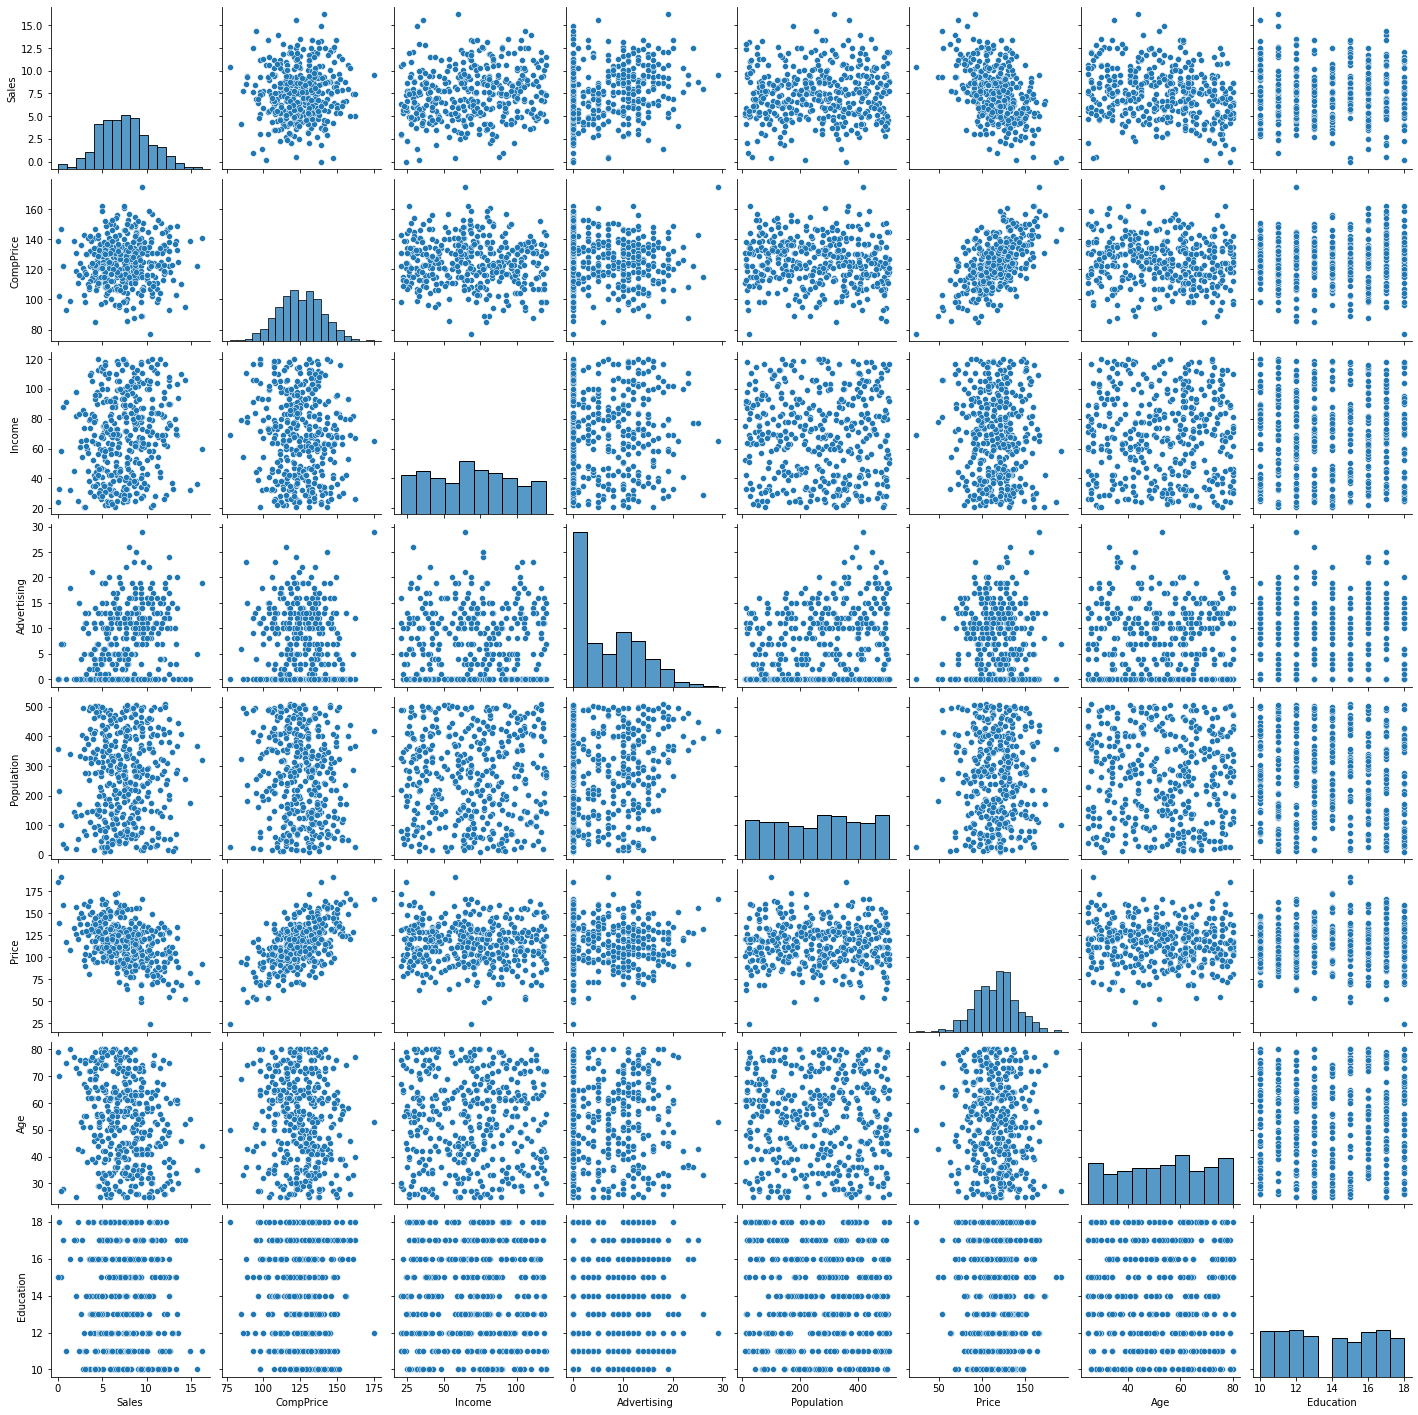

In [7]:
import seaborn as sns
[sns.pairplot(company)]

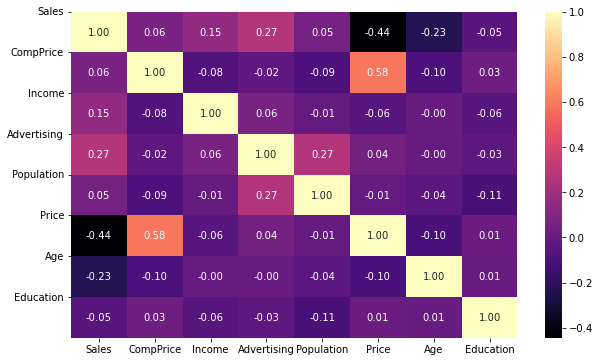

In [8]:
corr = company.corr()
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
plt.yticks(range(len(corr.columns)),corr.columns)
plt.show()

C:\Users\Aditya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


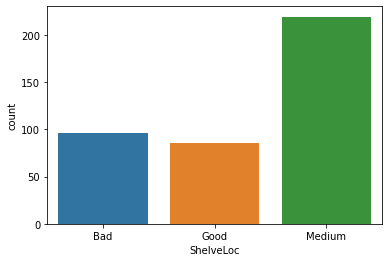

C:\Users\Aditya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


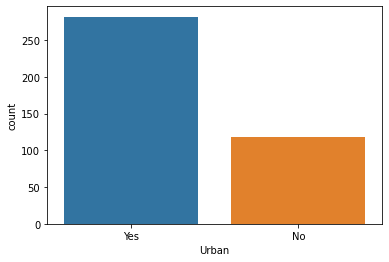

C:\Users\Aditya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


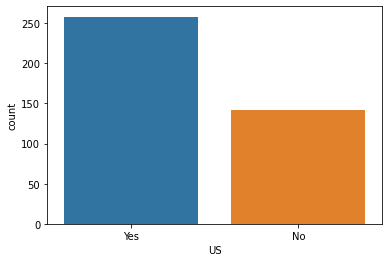

In [9]:
sns.countplot(company['ShelveLoc'])
plt.show()

sns.countplot(company['Urban'])
plt.show()

sns.countplot(company['US'])
plt.show()

In [10]:
company['Sales'] = pd.cut(x=company['Sales'],bins=[0,6,12,17],labels=['Low','Median','High'],right = False)
company['Sales']

0      Median
1      Median
2      Median
3      Median
4         Low
        ...  
395      High
396    Median
397    Median
398       Low
399    Median
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Median' < 'High']

C:\Users\Aditya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='count'>

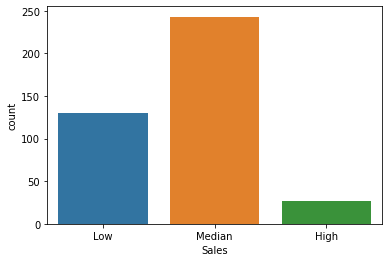

In [11]:
sns.countplot(company['Sales'])

In [12]:
company['Sales'].value_counts()

Median    243
Low       130
High       27
Name: Sales, dtype: int64

In [13]:
company['CompPrice'] = pd.cut(x=company['CompPrice'],bins=[77, 100, 133, 176], labels=['Low','Medium', 'High'], right = False)

company['Income'] = pd.cut(x=company['Income'],bins=[21, 46, 71, 121], labels=['Low','Medium', 'High'], right = False)

company['Advertising'] = pd.cut(x=company['Advertising'],bins=[0, 10, 20, 30], labels=['Low','Medium', 'High'], right = False)

company['Population'] = pd.cut(x=company['Population'],bins=[10, 170, 340, 510], labels=['Low','Medium', 'High'], right = False)

company['Price'] = pd.cut(x=company['Price'],bins=[24, 80, 136, 192], labels=['Low','Medium', 'High'], right = False)

company['Age'] = pd.cut(x=company['Age'],bins=[25, 45, 60, 81], labels=['Low','Medium', 'High'], right = False)

company['Education'] = pd.cut(x=company['Education'],bins=[10, 12.5, 15, 19], labels=['Low','Medium', 'High'], right = False)

In [14]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Median,High,High,Medium,Medium,Medium,Bad,Low,High,Yes,Yes
1,Median,Medium,Medium,Medium,Medium,Medium,Good,High,Low,Yes,Yes
2,Median,Medium,Low,Medium,Medium,Medium,Medium,Medium,Low,Yes,Yes
3,Median,Medium,High,Low,High,Medium,Medium,Medium,Medium,Yes,Yes
4,Low,High,Medium,Low,High,Medium,Bad,Low,Medium,Yes,No


In [15]:
label_encoder = preprocessing.LabelEncoder()

company['Sales'] = label_encoder.fit_transform(company['Sales'])
company['CompPrice'] = label_encoder.fit_transform(company['CompPrice'])
company['Income'] = label_encoder.fit_transform(company['Income'])
company['Advertising'] = label_encoder.fit_transform(company['Advertising'])
company['Population'] = label_encoder.fit_transform(company['Population'])
company['Price'] = label_encoder.fit_transform(company['Price'])
company['ShelveLoc'] = label_encoder.fit_transform(company['ShelveLoc'])
company['Age'] = label_encoder.fit_transform(company['Age'])
company['Education'] = label_encoder.fit_transform(company['Education'])
company['Urban'] = label_encoder.fit_transform(company['Urban'])
company['US'] = label_encoder.fit_transform(company['US'])

company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,0,0,2,2,2,0,1,0,1,1
1,2,2,2,2,2,2,1,0,1,1,1
2,2,2,1,2,2,2,2,2,1,1,1
3,2,2,0,1,0,2,2,2,2,1,1
4,1,0,2,1,0,2,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,2,2,2,1,1,2,1,1
396,2,0,1,1,1,2,2,2,1,0,1
397,2,0,1,2,0,0,2,1,0,1,1
398,1,2,0,1,2,2,0,2,1,1,1


In [16]:
X = company.drop('Sales', axis = 1)
y = company['Sales']

In [17]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,0,2,2,2,0,1,0,1,1
1,2,2,2,2,2,1,0,1,1,1
2,2,1,2,2,2,2,2,1,1,1
3,2,0,1,0,2,2,2,2,1,1
4,0,2,1,0,2,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...
395,0,0,2,2,2,1,1,2,1,1
396,0,1,1,1,2,2,2,1,0,1
397,0,1,2,0,0,2,1,0,1,1
398,2,0,1,2,2,0,2,1,1,1


In [18]:
y

0      2
1      2
2      2
3      2
4      1
      ..
395    0
396    2
397    2
398    1
399    2
Name: Sales, Length: 400, dtype: int32

In [19]:
x_train, x_test,y_train,y_test = train_test_split(X,y,test_size= 0.33,random_state=42)

In [20]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
258,2,1,1,2,2,0,0,2,0,0
177,0,0,1,1,2,2,1,0,1,1
119,2,0,1,1,2,2,0,1,1,1
194,2,0,2,0,2,2,2,1,1,1
229,1,0,1,0,1,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
71,0,2,2,1,0,2,2,0,0,1
106,2,1,1,2,0,2,0,0,0,0
270,2,1,1,2,2,1,1,1,1,0
348,2,0,0,0,2,1,2,1,1,1


In [21]:
x_test

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
209,1,1,2,2,2,0,0,1,0,1
280,2,0,2,0,0,0,2,1,1,1
33,2,1,2,2,2,1,2,0,1,1
210,2,1,1,0,2,0,2,2,0,1
93,0,1,1,1,2,2,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...
332,2,1,0,0,2,2,0,1,1,1
167,2,0,1,2,2,2,0,2,1,0
245,2,1,1,2,2,1,2,1,0,1
311,0,2,2,2,2,0,2,2,1,1


In [22]:
y_train

258    1
177    2
119    2
194    2
229    2
      ..
71     2
106    1
270    2
348    0
102    1
Name: Sales, Length: 268, dtype: int32

In [23]:
y_test

209    1
280    1
33     2
210    1
93     2
      ..
332    1
167    2
245    2
311    2
145    2
Name: Sales, Length: 132, dtype: int32

In [24]:
model_c5 = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model_c5.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

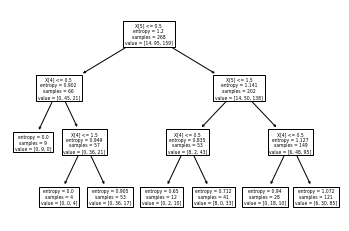

In [25]:
tree.plot_tree(model_c5);

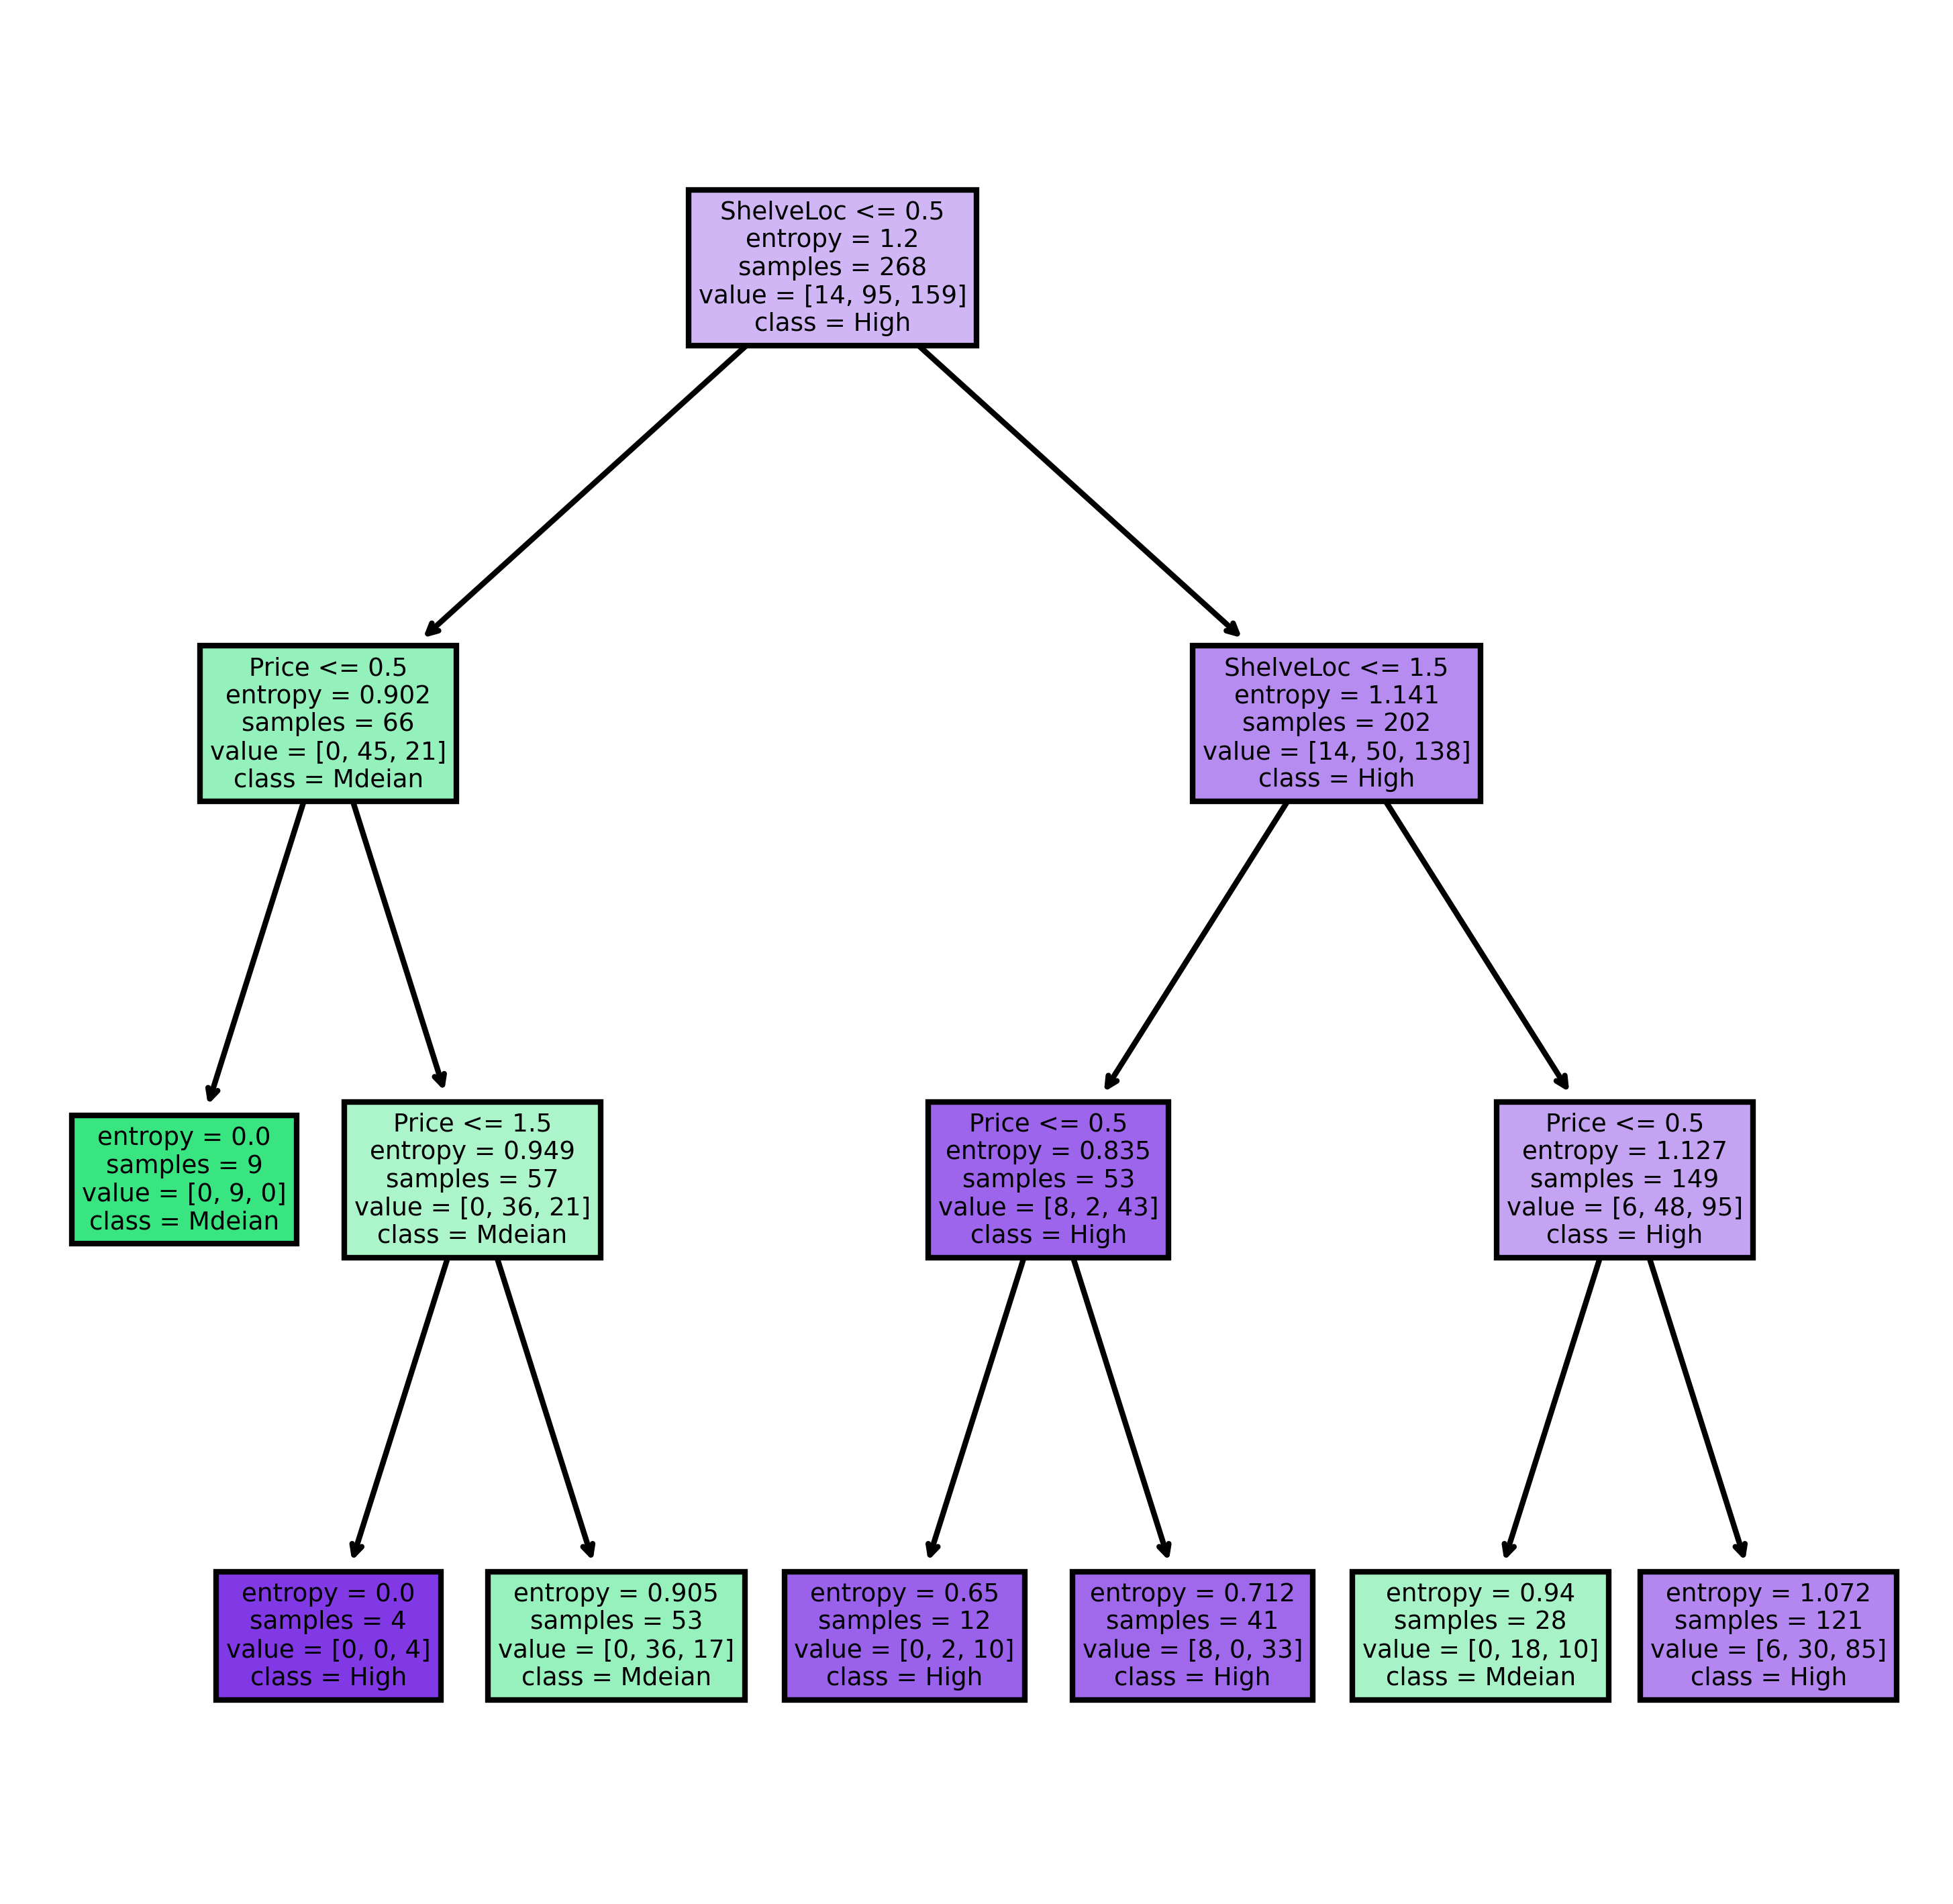

In [26]:
fn=['CompPrice', 'Income', 'Advertising','Population','Price',
        'ShelveLoc','Age','Education','Urban','US']
cn=['Low','Mdeian','High']
fig, axes=plt.subplots(nrows = 1,ncols =1,figsize =(6,6),dpi=600)
tree.plot_tree(model_c5,
                feature_names = fn,
                 class_names=cn,
                filled = True);

In [27]:
preds = model_c5.predict(x_test)

In [28]:
preds

array([1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2])

In [29]:
pd.crosstab(y_test, preds)

col_0,1,2
Sales,,
0,0,13
1,22,13
2,16,68


In [30]:
model_c5.score(x_test, y_test)

0.6818181818181818

In [31]:
model_CART = DecisionTreeClassifier(criterion = 'gini', max_depth= 3)
model_CART.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

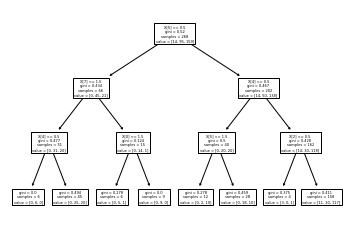

In [32]:
tree.plot_tree(model_CART);

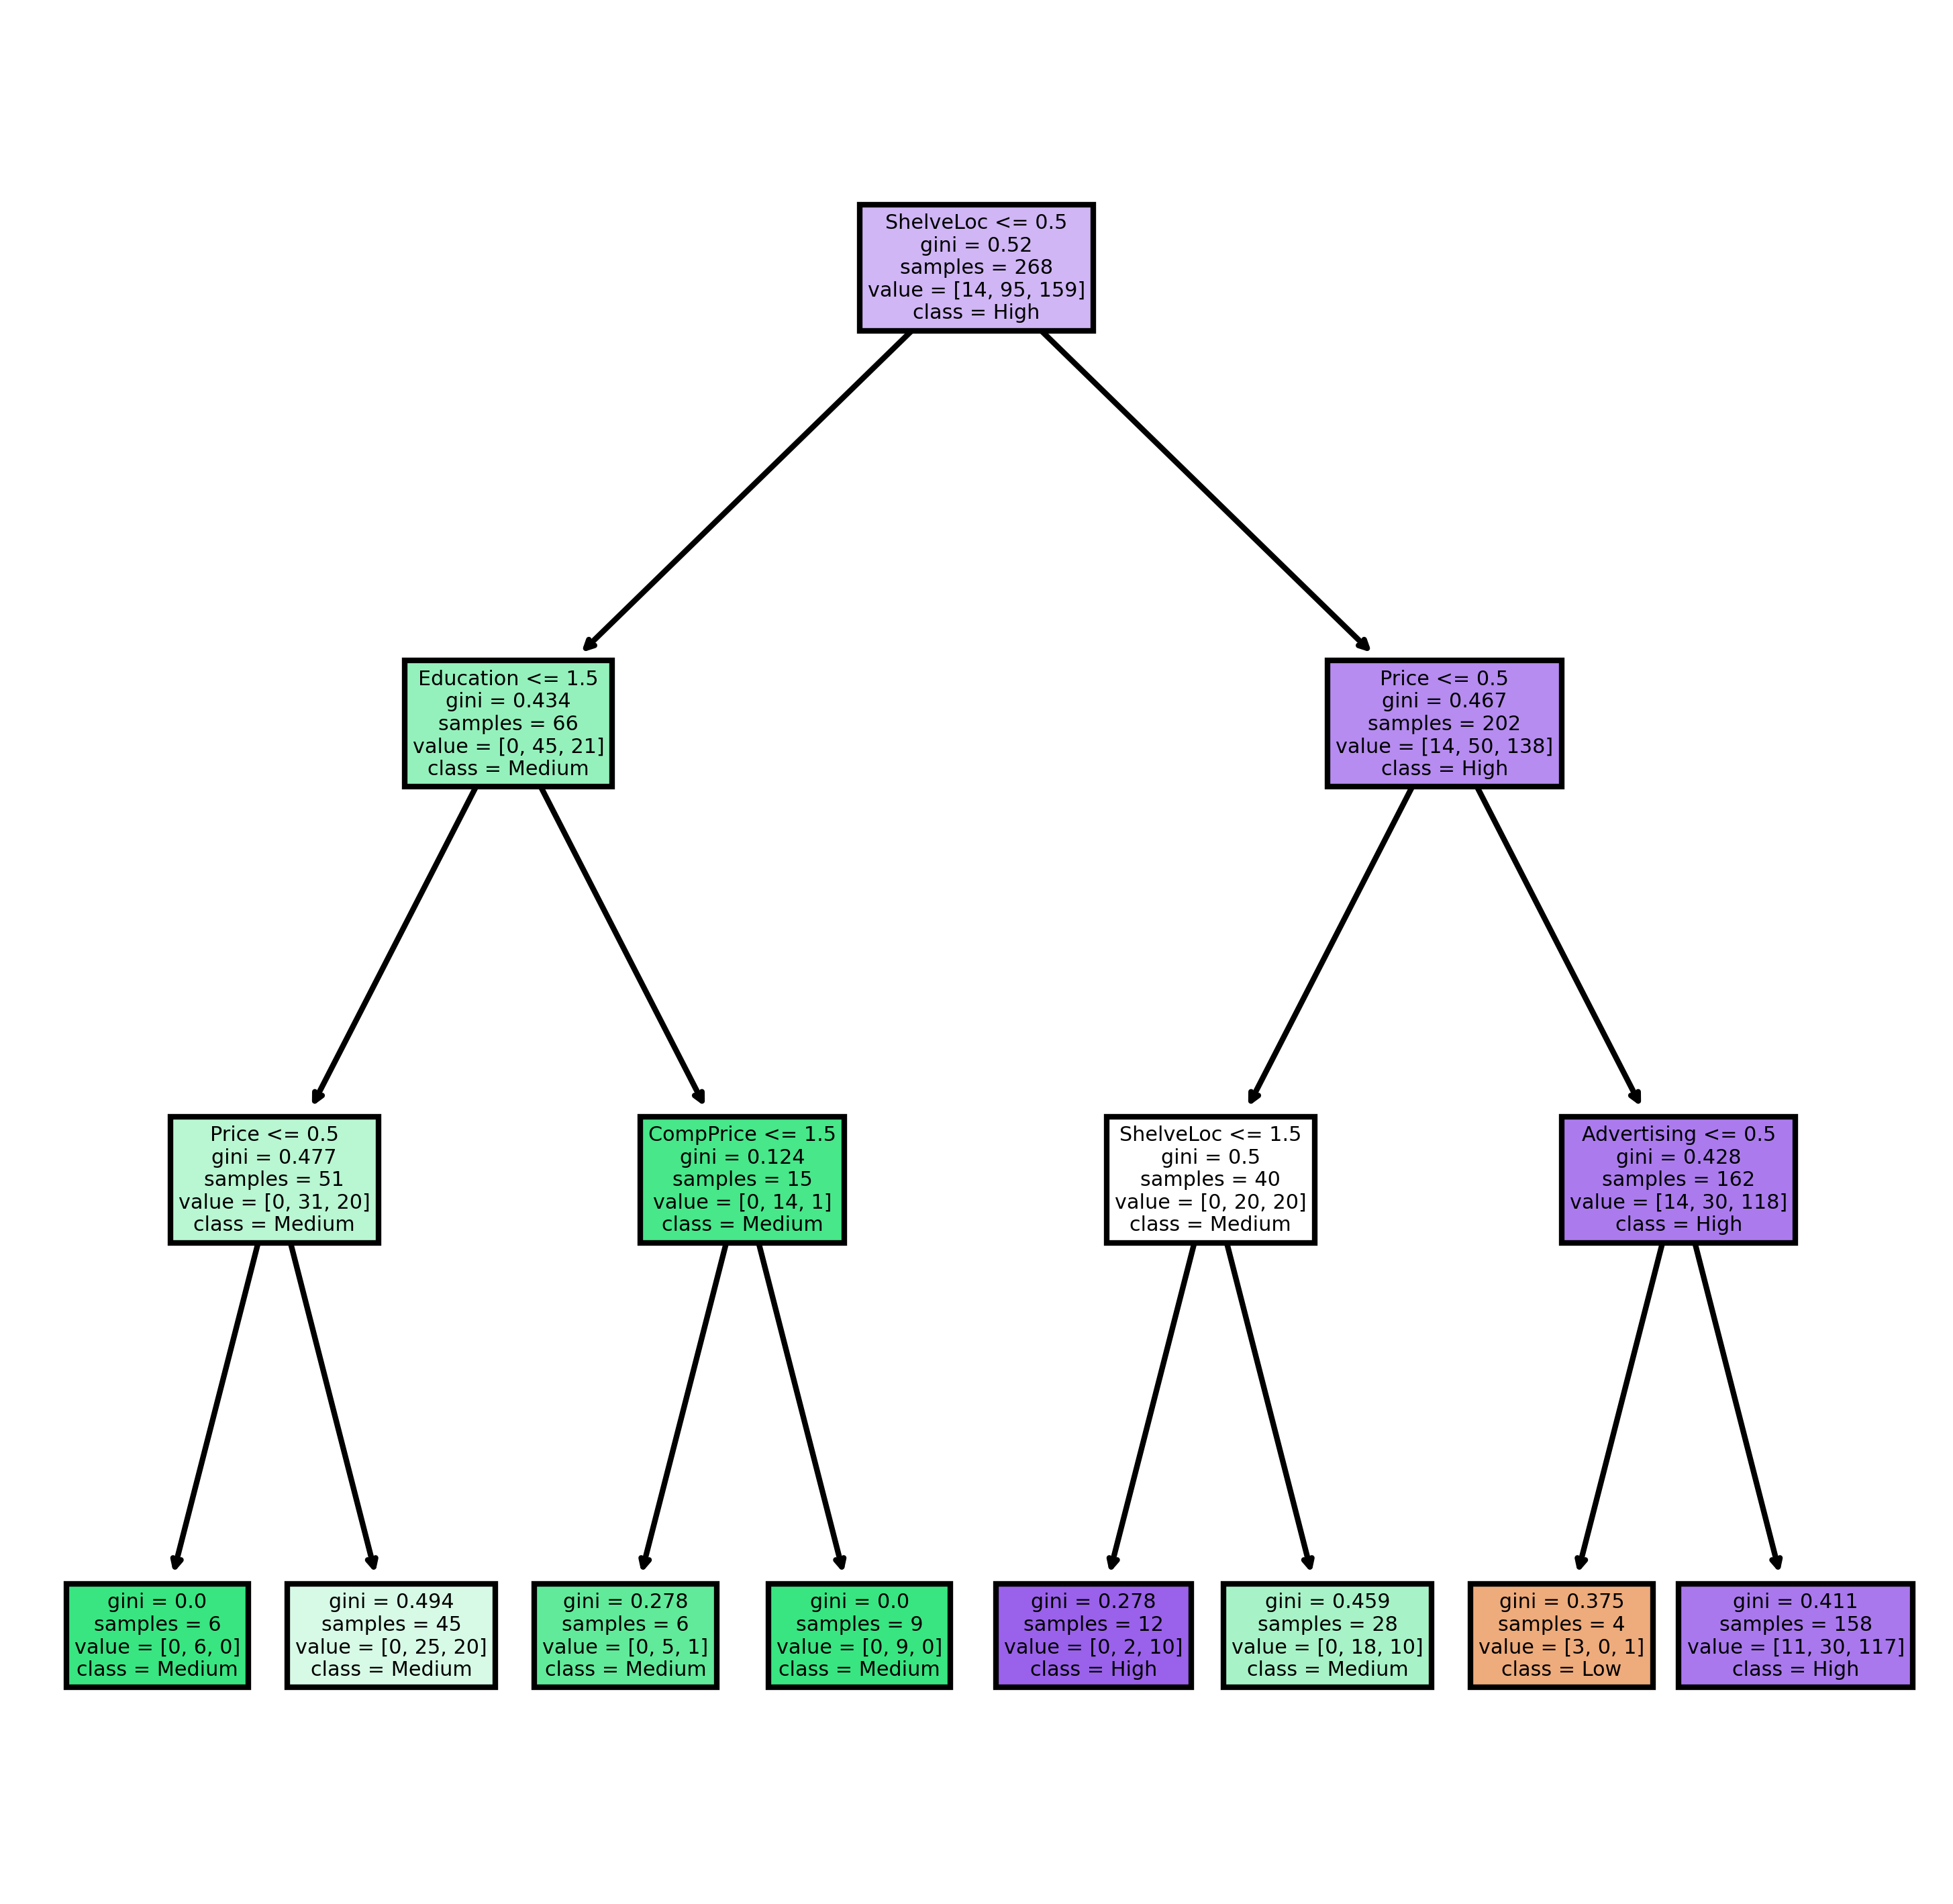

In [33]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_CART,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [34]:
preds = model_CART.predict(x_test)
pd.Series(preds).value_counts()

2    89
1    40
0     3
dtype: int64

In [35]:
preds

array([1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2])

In [36]:
pd.crosstab(y_test, preds)

col_0,0,1,2
Sales,,,
0,0,0,13
1,1,22,12
2,2,18,64


In [37]:
model_CART.score(x_test, y_test)

0.6515151515151515